# Stage 1 : EDA, Insights & Visualizations

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load DataSet
from pandas import ExcelFile
df = pd.read_csv('/content/drive/MyDrive/TravelInsurancePrediction.csv')

## Descriptive Statistics

In [ ]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.shape

(1987, 10)

**HASIL OBSERVASI :**

*   Terdapat Column Unnamed: 0 tanpa keterangan nama pada fitur ini, untuk stage 1 kami masih gunakan column ini sebagai mana adanya.
*   Pengelompokkan columns berdasarkan numericals dan categoricals.
*   Tidak adanya missing values pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat missing values).
*   Tidak adanya duplicate data pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat duplicate data).
*   Dataset ini memiliki 10 columns dan 1987 rows.

In [ ]:
# Cek Missing Values
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

> Hasil Observasi dari Cek Missing Values adalah tidak ada missing values pada data ini.



In [ ]:
# Cek Duplicate Data
df.duplicated().sum()

0



> Hasil Observasi dari Cek Data Duplicated adalah tidak ada duplicate data pada data ini.


## Statistika Summary

In [ ]:
# separated columns base on type of data
categoricals = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
numericals = ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']

In [ ]:
df[numericals].describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df[categoricals].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


## Univariate Analysis

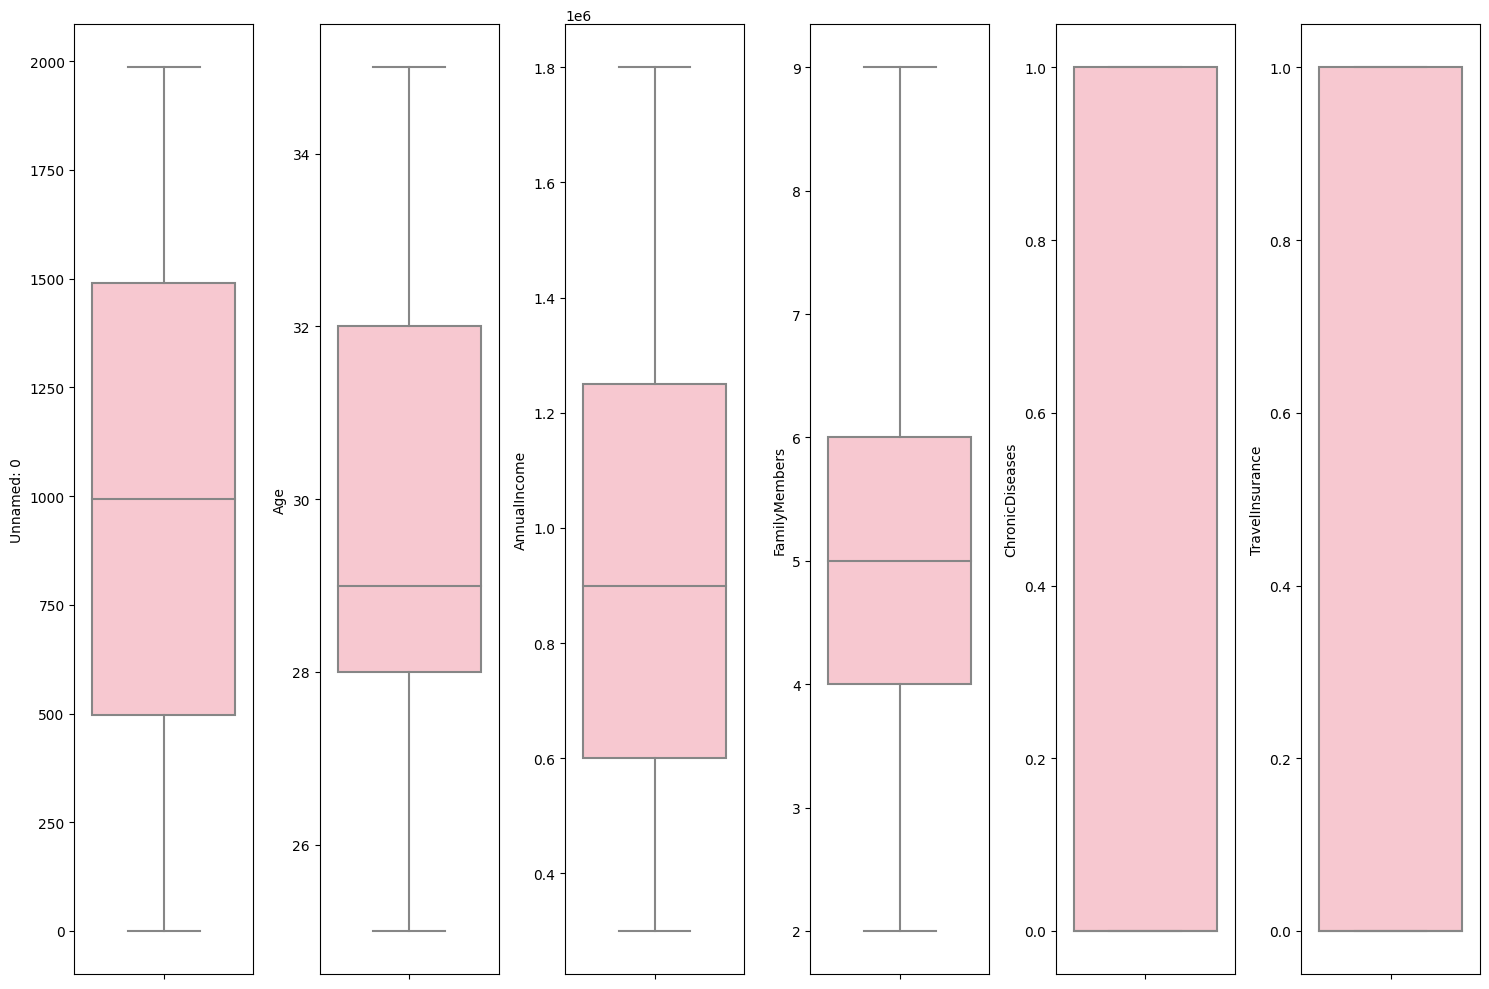

In [ ]:
# Individual Boxplot (Numericals)
plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='pink', orient='v', showfliers=True)
    plt.tight_layout()

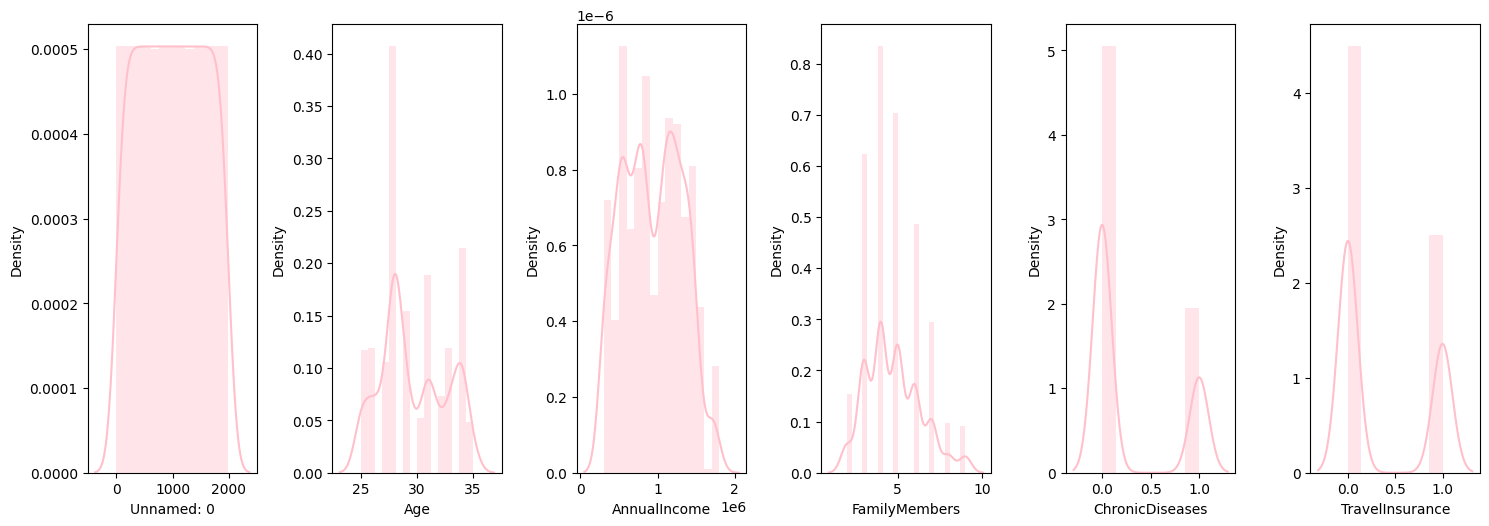

In [ ]:
# Individual Boxplot (Numericals)
plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(2, len(numericals), i+1)
    sns.distplot(df[numericals[i]], color='pink')
    plt.tight_layout()

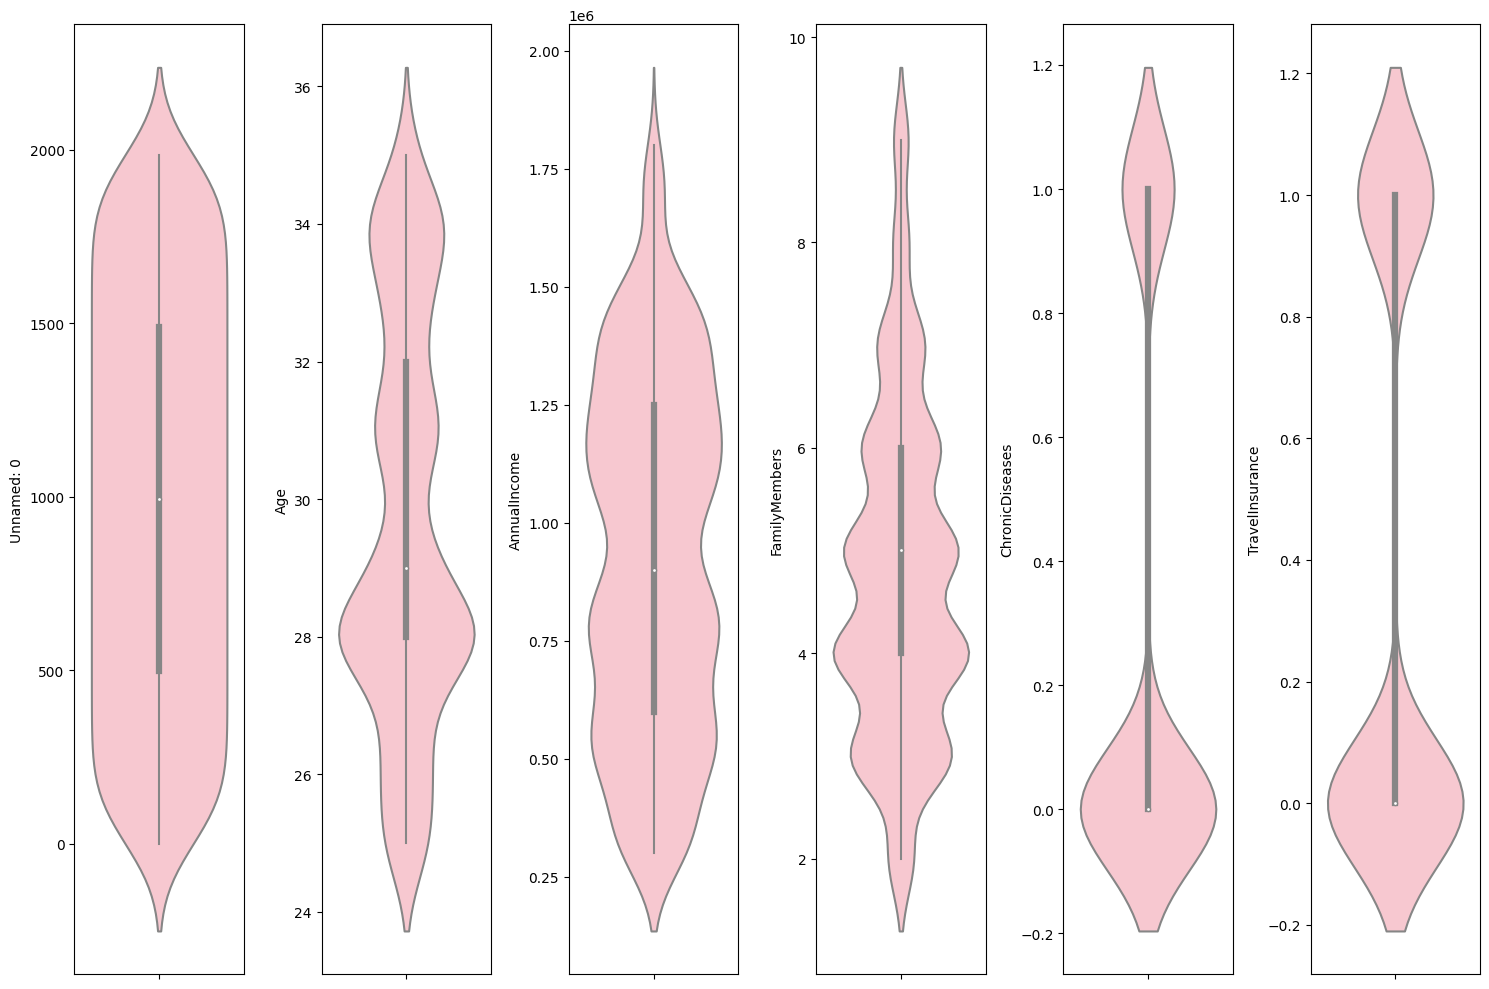

In [ ]:
# Individual Violin Plots (numericals)
plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.violinplot(y=df[numericals[i]], color='pink', orient='v')
    plt.tight_layout()

In [ ]:
# Mencari Outliers Menggunakan IQR

for i in df.columns:
    if df[i].dtypes in [np.int64, np.float64]:
        print(i, ':', df[i].dtypes)

        Q1 = df[i].quantile(0.25)
        print('Q1 =', Q1)

        Q3 = df[i].quantile(0.75)
        print('Q3 =', Q3)

        IQR = Q3 - Q1
        print('IQR =', IQR)

        nilai_min = df[i].min()
        print('nilai min =', nilai_min)
        min_IQR = Q1 - 1.5 * IQR
        print('min_IQR =', min_IQR)

        nilai_max = df[i].max()
        print('nilai max =', nilai_max)
        max_IQR = Q3 + 1.5 * IQR
        print('max_IQR =', max_IQR)

        # Mencari outliers
        if nilai_min < min_IQR:
            print('Low outlier is found <', min_IQR)
            print('Low outlier Index:', list(df[df[i] < min_IQR].index))
        if nilai_max > max_IQR:
            print('High outlier is found >', max_IQR)
            print('High outlier Index:', list(df[df[i] > max_IQR].index))

        print('\n')

Unnamed: 0 : int64
Q1 = 496.5
Q3 = 1489.5
IQR = 993.0
nilai min = 0
min_IQR = -993.0
nilai max = 1986
max_IQR = 2979.0


Age : int64
Q1 = 28.0
Q3 = 32.0
IQR = 4.0
nilai min = 25
min_IQR = 22.0
nilai max = 35
max_IQR = 38.0


AnnualIncome : int64
Q1 = 600000.0
Q3 = 1250000.0
IQR = 650000.0
nilai min = 300000
min_IQR = -375000.0
nilai max = 1800000
max_IQR = 2225000.0


FamilyMembers : int64
Q1 = 4.0
Q3 = 6.0
IQR = 2.0
nilai min = 2
min_IQR = 1.0
nilai max = 9
max_IQR = 9.0


ChronicDiseases : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
min_IQR = -1.5
nilai max = 1
max_IQR = 2.5


TravelInsurance : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
min_IQR = -1.5
nilai max = 1
max_IQR = 2.5




**Kesimpulan :**


*   Tidak ada outlier pada data numerical
* Age distribusi bimodal
* annualIncome distribusi mendekati normal
* familyMembers skew kanan




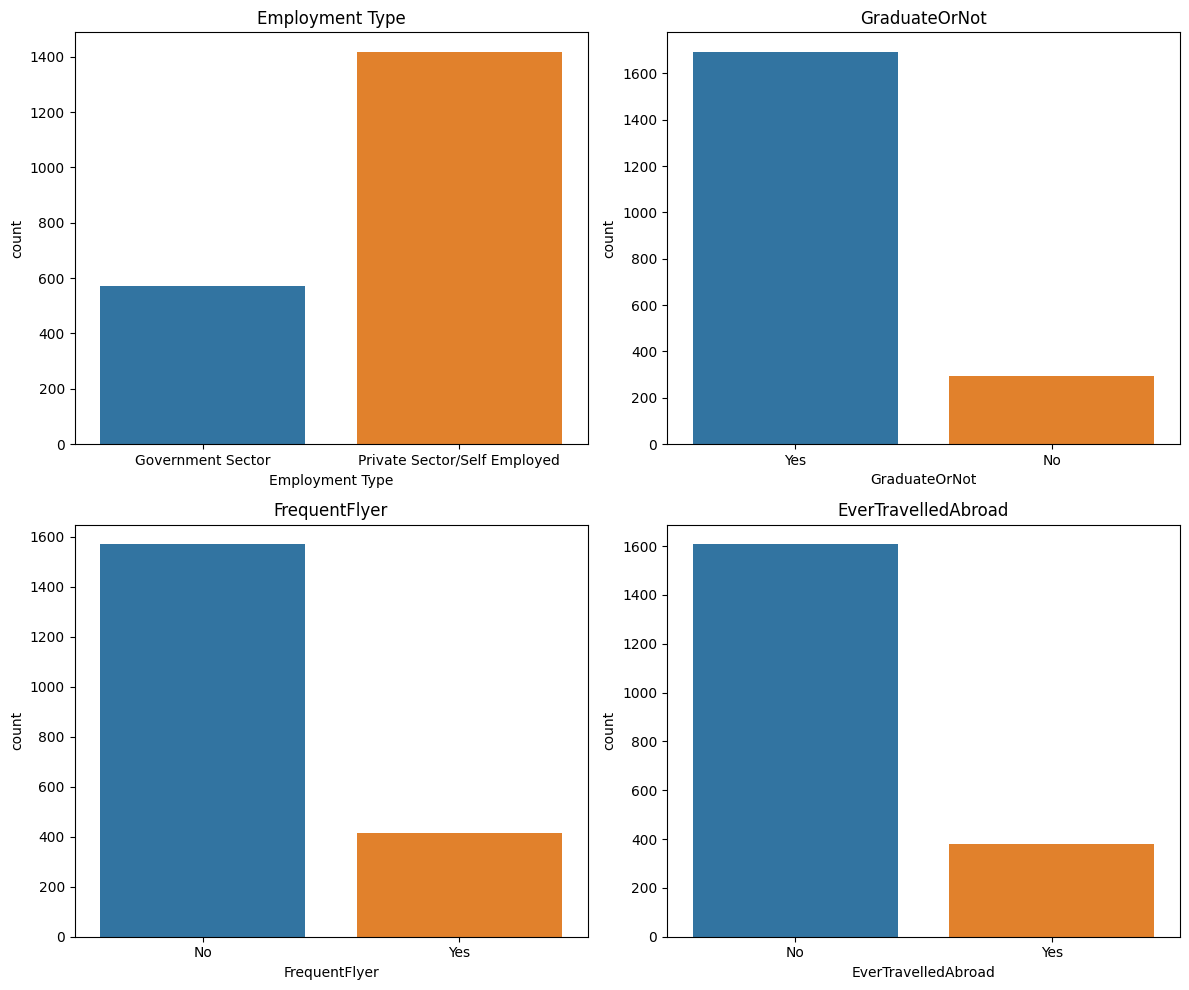

In [ ]:
#Categorical data
# Calculate the number of rows and columns for the subplot grid
num_rows = int(len(categoricals) / 2) + len(categoricals) % 2
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

# count plots
for i, cat_var in enumerate(categoricals):
    sns.countplot(x=cat_var, data=df, ax=axes[i])
    axes[i].set_title(cat_var)

# Hide any remaining empty subplots
for i in range(len(categoricals), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
proportions = {}
for cat_var in categoricals:
    proportions[cat_var] = (df[cat_var].value_counts() / len(df)) * 100

# Display Proportions and Percentages
for cat_var in categoricals:
    print(f"Proportions for {cat_var}:")
    print(proportions[cat_var])
    print("\n")

Proportions for Employment Type:
Private Sector/Self Employed    71.313538
Government Sector               28.686462
Name: Employment Type, dtype: float64


Proportions for GraduateOrNot:
Yes    85.153498
No     14.846502
Name: GraduateOrNot, dtype: float64


Proportions for FrequentFlyer:
No     79.013588
Yes    20.986412
Name: FrequentFlyer, dtype: float64


Proportions for EverTravelledAbroad:
No     80.875692
Yes    19.124308
Name: EverTravelledAbroad, dtype: float64




## Multivariate Analysis

In [ ]:
df2=df.drop(df.columns[0], axis=1)
df3=df2.copy()

In [ ]:
mapping_EmploymentType = {'Government Sector':1,'Private Sector/Self Employed':0}
mapping_GraduateOrNot = {'Yes':1,'No':0}
mapping_FrequentFlyer = {'Yes':1,'No':0}
mapping_EverTravelledAbroad = {'Yes':1,'No':0}

df3['Employment Type']= df2['Employment Type'].map(mapping_EmploymentType)
df3['GraduateOrNot']= df2['GraduateOrNot'].map(mapping_GraduateOrNot)
df3['FrequentFlyer']= df2['FrequentFlyer'].map(mapping_FrequentFlyer)
df3['EverTravelledAbroad']= df2['EverTravelledAbroad'].map(mapping_EverTravelledAbroad)

<Axes: >

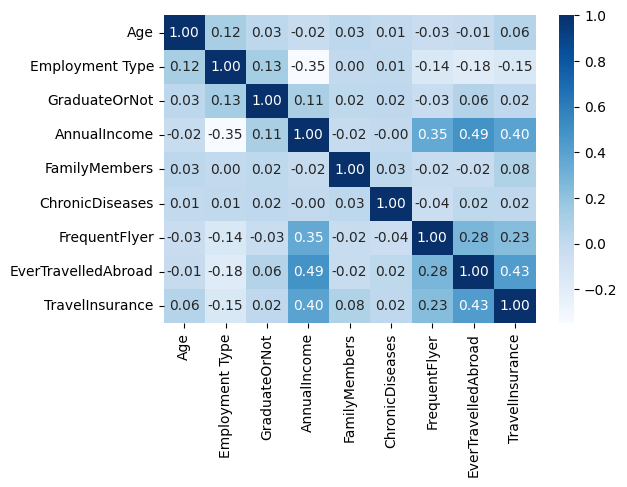

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df3.corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat pasang-pasangan feature yang berkorelasi satu sama lain yaitu :</br>
-FreqentFlyer dan Annual Income (0.35) </br>
-EverTravelledAbroad dan Annual Income(0.49)</br>

-EmploymentType dan Annual Income (-0.35)</br>
-EverTravelledAbroad dan FrequentFlyer(0.28)</br>
-TravelInsurance dan Annual Income(0.40)</br>
-TravelInsurance dan FrequentFlyer(0.23)</br>
-TravelInsurance dan EverTravelledAbroad(0.43)</br>




<Figure size 1000x1000 with 0 Axes>

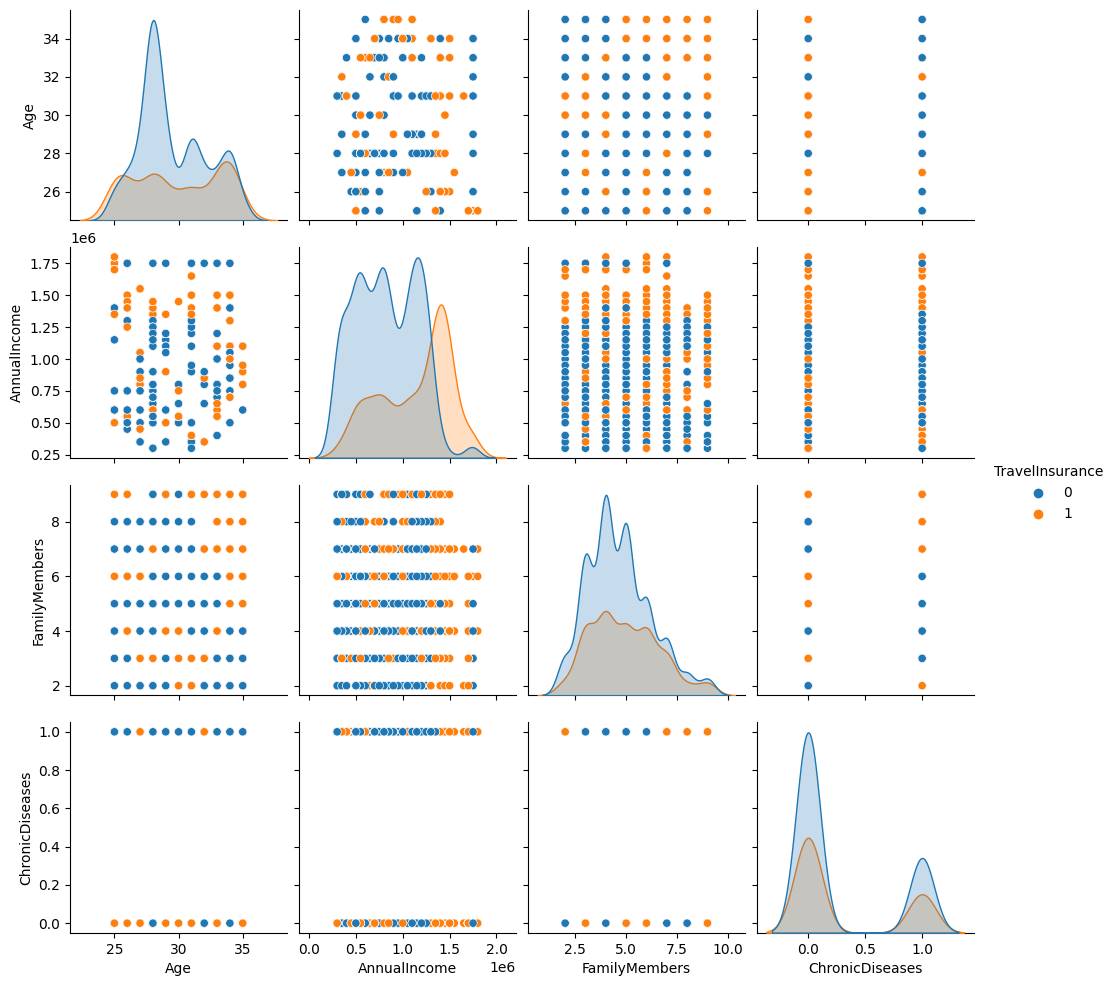

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(df2, diag_kind='kde',hue='TravelInsurance')

Terlihat korelasi antara pembelian travelinsurance dengan : </br>
-Age + Family Member </br>
-Age + Chronic Disease (-) </br>
-Family Member + Annual Income </br>

##Insight & Business Recommendation

In [72]:
travel = df.groupby(df['TravelInsurance'])['Unnamed: 0'].count().reset_index()
from decimal import ROUND_UP
travel['Percentage_TI']=round(travel['Unnamed: 0']/(sum(travel['Unnamed: 0']))*100,0)
travel


,TravelInsurance,Unnamed: 0,Percentage_TI
0,0,1277,64.0
1,1,710,36.0


([<matplotlib.patches.Wedge at 0x79706febefb0>,
 [Text(-0.46835717599151955, 0.995309778760989, '0'),
  Text(0.468357175991519, -0.9953097787609894, '1')],
 [Text(-0.2554675505408288, 0.5428962429605394, '64%'),
  Text(0.2554675505408285, -0.5428962429605396, '36%')])

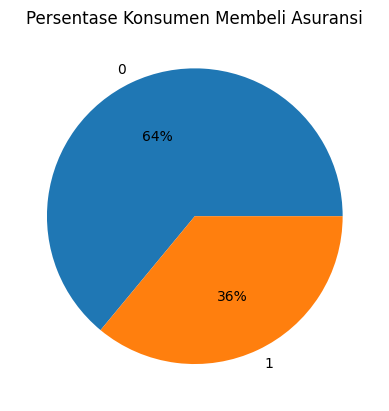

In [73]:
plt.title('Persentase Konsumen Membeli Asuransi')
plt.pie(travel['Percentage_TI'],labels=travel['TravelInsurance'],autopct='%.0f%%')

Insight : Persentase pelanggan yang tidak tertarik membeli travel insurance lebih besar yaitu sebesar 64%.

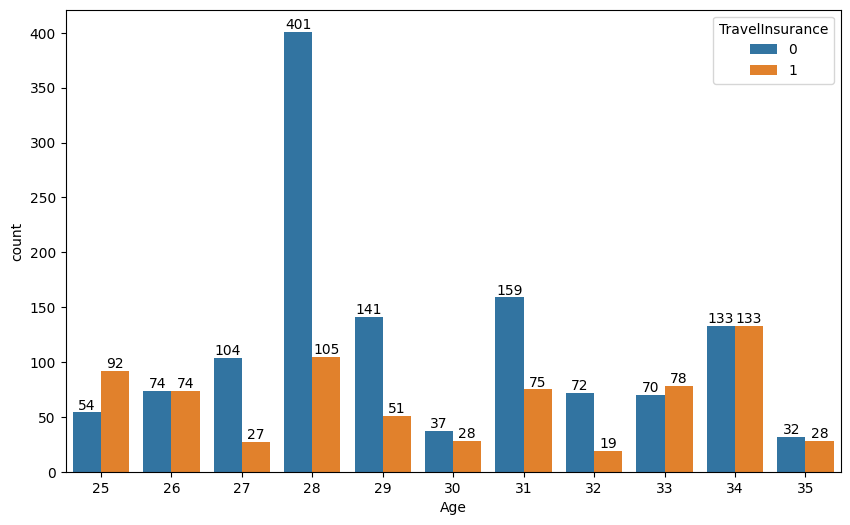

In [ ]:
fig, value = plt.subplots(figsize=(10,6))
a = sns.countplot(x = df['Age'],hue = df['TravelInsurance'])
for age in a.containers:
  a.bar_label(age)

Insight : Pelanggan dengan umur 27-32tahun terlihat banyak yang tidak tertarik untuk membeli travel insurance dimana kurang dari 50%. Sedangkan pelanggan umur <= 26 dan >=33 terlihat banyak yg tertarik membeli atau >=50%.

Recommendation : Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26tahun dan diatas 33tahun.

In [ ]:
et1 = df.groupby(['TravelInsurance','Employment Type'])['Unnamed: 0'].nunique().reset_index(name = 'Customer')
et2 = df.groupby(['TravelInsurance'])['Unnamed: 0'].nunique().reset_index(name = 'Total_Customer')
et = et1.merge(et2)
et['Percentage_cust']=round(et['Customer']/et['Total_Customer']*100,0)
et

,TravelInsurance,Employment Type,Customer,Total_Customer,Percentage_cust
0,0,Government Sector,430,1277,34.0
1,0,Private Sector/Self Employed,847,1277,66.0
2,1,Government Sector,140,710,20.0
3,1,Private Sector/Self Employed,570,710,80.0


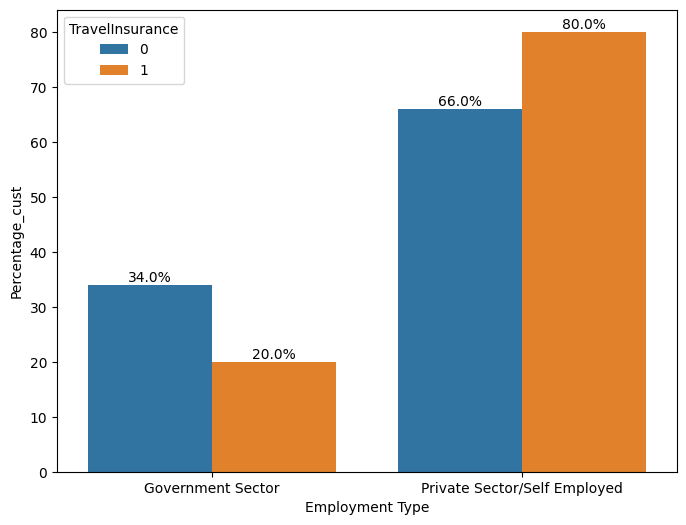

In [ ]:
fig, value = plt.subplots(figsize=(8,6))
txt = sns.barplot(x=et['Employment Type'], y=et['Percentage_cust'], data = et, hue=et['TravelInsurance'])
for value in txt.containers:
  txt.bar_label(value, fmt='%.1f%%')

Insigt : Pelanggan dengan tipe pekerjaan private sector/self employed lebih tertarik membeli travel insurance sebesar 80% dibanding government sector yang hanya tertarik 20% saja.

Recommendation : Melakukan promo penawaran dengan target pelanggan yang bekerja di private sector/self employment.

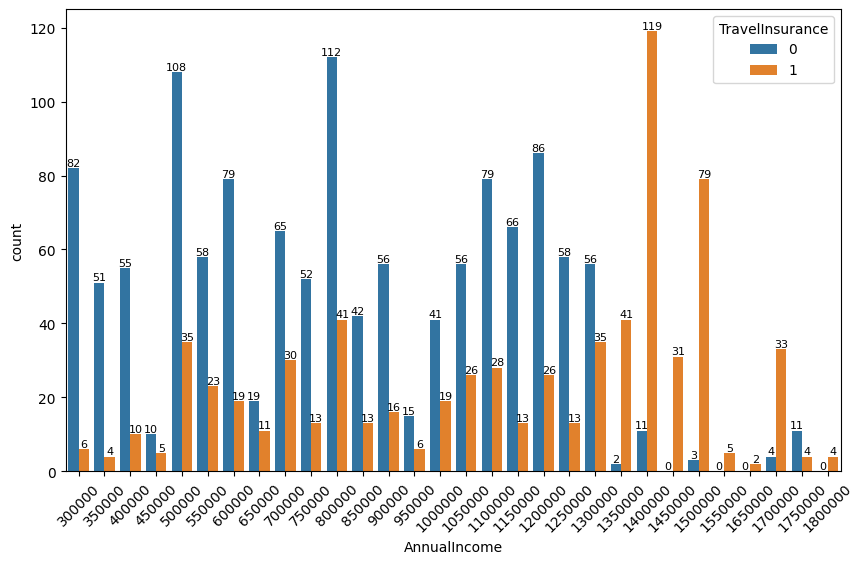

In [ ]:
fig, value = plt.subplots(figsize=(10,6))
ai = sns.countplot(x = df['AnnualIncome'],hue = df['TravelInsurance'])
for ai1 in ai.containers:
  ai.bar_label(ai1,size=8)
plt.xticks(rotation=45)
plt.show()

Insight : Terjadi kenaikan tajam pada pelanggan dengan pendapatan tahunan diatas 1300000 untuk tertarik untuk membeli asuransi perjalanan.

Recommendation : Melakukan promo penawaran dengan target pelanggan yang memiliki annual income diatas 1300000.

In [ ]:
gr1 = df.groupby(['TravelInsurance','GraduateOrNot'])['Unnamed: 0'].nunique().reset_index(name = 'Customer')
gr2 = df.groupby(['TravelInsurance'])['Unnamed: 0'].nunique().reset_index(name = 'Total_Customer')
gr = gr1.merge(gr2)
gr['Percentage_GraduateOrNot']=round(gr['Customer']/gr['Total_Customer']*100,0)
gr

,TravelInsurance,GraduateOrNot,Customer,Total_Customer,Percentage_GraduateOrNot
0,0,No,196,1277,15.0
1,0,Yes,1081,1277,85.0
2,1,No,99,710,14.0
3,1,Yes,611,710,86.0


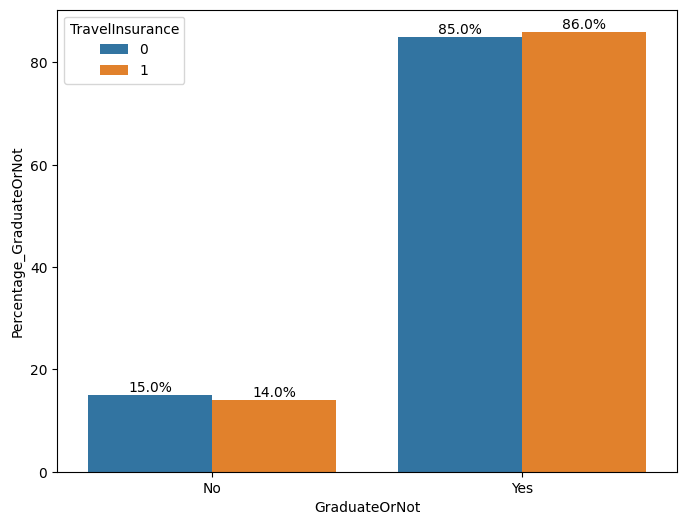

In [ ]:
fig, value = plt.subplots(figsize=(8,6))
txt1 = sns.barplot(x=gr['GraduateOrNot'], y=gr['Percentage_GraduateOrNot'], data = gr, hue=gr['TravelInsurance'])
for text1 in txt1.containers:
  txt1.bar_label(text1, fmt='%.1f%%')

Insigt : Pelanggan dengan lulusan perguruan tinggi lebih tertarik membeli travel insurance sebesar 86% sedangkan pelanggan yang bukan lulusan perguruan tinggi yang hanya tertarik 14% saja.

Recommendation : Melakukan promo penawaran dengan target pelanggan yang merupakan lulusan perguruan tinggi.

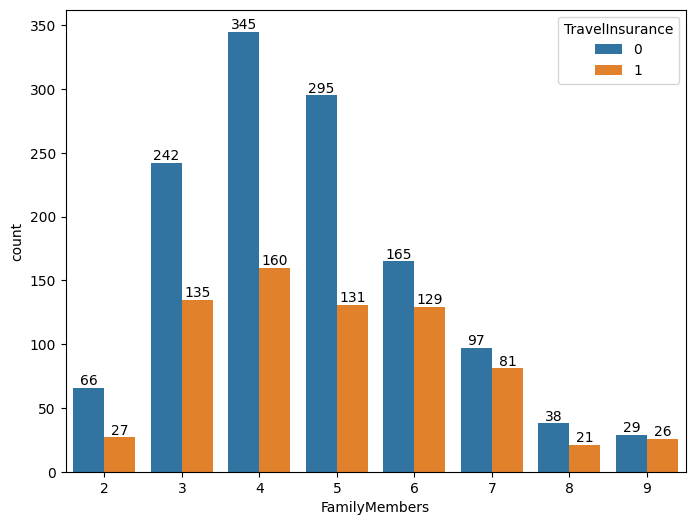

In [ ]:
fig, value = plt.subplots(figsize=(8,6))
fm = sns.countplot(x = df['FamilyMembers'],hue = df['TravelInsurance'])
for fam in fm.containers:
  fm.bar_label(fam)

Insight : Keluarga dengan jumlah anggota 6 orang keatas lebih terlihat tertarik untuk membeli travel insurance hampir 50%, sedangkan yang berjumlah 2 orang terlihat hanya sedikit yang tertarik dan keluarga dengan anggota 3-5 orang agak banyak tertarik.

Recommendation : Membagi jumlah keluarga menjadi 3 kategori.

In [ ]:
cd1 = df.groupby(['TravelInsurance','ChronicDiseases'])['Unnamed: 0'].nunique().reset_index(name='Customer')
cd2 = df.groupby(['TravelInsurance'])['Unnamed: 0'].nunique().reset_index(name='TotalCustomer')
cd = cd1.merge(cd2)
cd['Percentage_ChronicDiseases'] = round((cd['Customer']/cd['TotalCustomer']*100),0)
cd

,TravelInsurance,ChronicDiseases,Customer,TotalCustomer,Percentage_ChronicDiseases
0,0,0,930,1277,73.0
1,0,1,347,1277,27.0
2,1,0,505,710,71.0
3,1,1,205,710,29.0


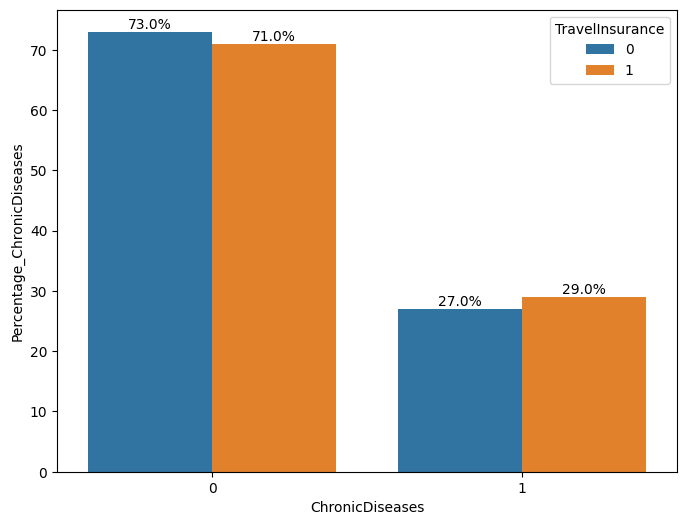

In [ ]:
fig, value = plt.subplots(figsize=(8,6))
chronic = sns.barplot(x=cd['ChronicDiseases'], y=cd['Percentage_ChronicDiseases'], data = cd, hue=cd['TravelInsurance'])
for c in chronic.containers:
  chronic.bar_label(c, fmt='%.1f%%')

Insight : Pelanggan dengan penyakit bawaan maupun tidak, tidak memiliki dampak yang signifikan pada pembelian travel insurance.

In [ ]:
eta1 = df.groupby(['TravelInsurance','EverTravelledAbroad'])['Unnamed: 0'].nunique().reset_index(name='Customer')
eta2 = df.groupby(['TravelInsurance'])['Unnamed: 0'].nunique().reset_index(name='TotalCustomer')
eta = eta1.merge(eta2)
eta['Percentage_EverTravelledAbroad'] = round((eta['Customer']/eta['TotalCustomer']*100),0)
eta

,TravelInsurance,EverTravelledAbroad,Customer,TotalCustomer,Percentage_EverTravelledAbroad
0,0,No,1195,1277,94.0
1,0,Yes,82,1277,6.0
2,1,No,412,710,58.0
3,1,Yes,298,710,42.0


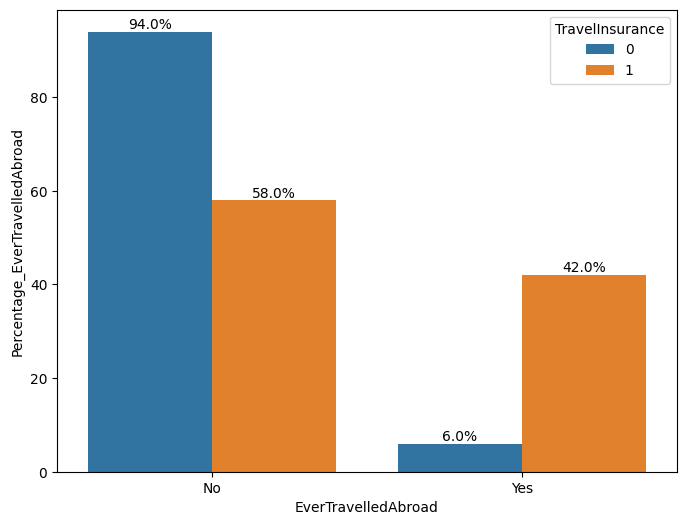

In [ ]:
fig, value = plt.subplots(figsize=(8,6))
travel = sns.barplot(x=eta['EverTravelledAbroad'], y=eta['Percentage_EverTravelledAbroad'], data = eta, hue=eta['TravelInsurance'])
for t in travel.containers:
  travel.bar_label(t, fmt='%.1f%%')

Insight : Secara signifikan pelanggan yang melakukan perjalanan abroad lebih banyak tertarik untuk membeli travel insurance yaitu sebesar 42% dibanding yang tidak membeli. Sedangkan pelanggan yang tidak melakukan perjalanan abroad merasa tidak tertarik untuk membeli travel insurance.

Recommendation : Melakukan promo penawaran dengan target pelanggan yang akan melakukan perjalanan abroad.

In [ ]:
ff1 = df.groupby(['TravelInsurance','FrequentFlyer'])['Unnamed: 0'].nunique().reset_index(name='Customer')
ff2 = df.groupby(['TravelInsurance'])['Unnamed: 0'].nunique().reset_index(name='TotalCustomer')
ff = ff1.merge(ff2)
ff['Percentage_FrequentFlyer'] = round((ff['Customer']/ff['TotalCustomer']*100),0)
ff

,TravelInsurance,FrequentFlyer,Customer,TotalCustomer,Percentage_FrequentFlyer
0,0,No,1099,1277,86.0
1,0,Yes,178,1277,14.0
2,1,No,471,710,66.0
3,1,Yes,239,710,34.0


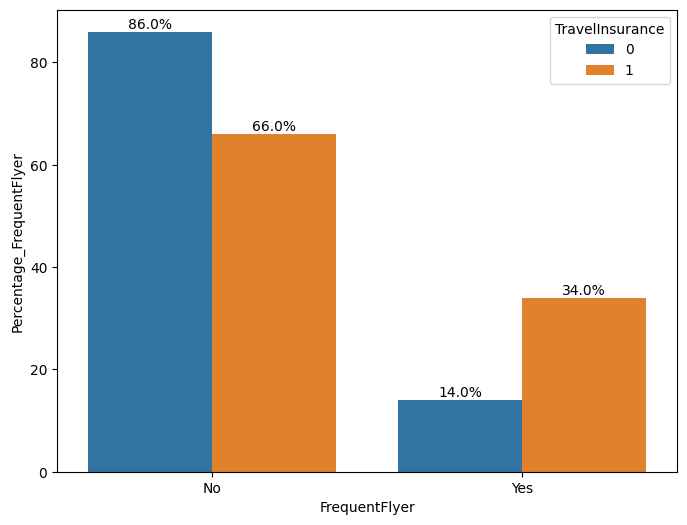

In [ ]:
fig, value = plt.subplots(figsize=(8,6))
fly = sns.barplot(x=ff['FrequentFlyer'], y=ff['Percentage_FrequentFlyer'], data = ff, hue=ff['TravelInsurance'])
for f in fly.containers:
  fly.bar_label(f, fmt='%.1f%%')


Insight : Pelanggan yang sering melakukan penerbangan lebih banyak tertarik untuk membeli travel insurance.

Recommendation : Melakukan promo dengan target pelanggan yang sering melakukan penerbangan.

In [ ]:
nums=['Age','AnnualIncome','FamilyMembers']
cats=['GraduateOrNot','Employment Type','EverTravelledAbroad','FrequentFlyer','ChronicDiseases','TravelInsurance']

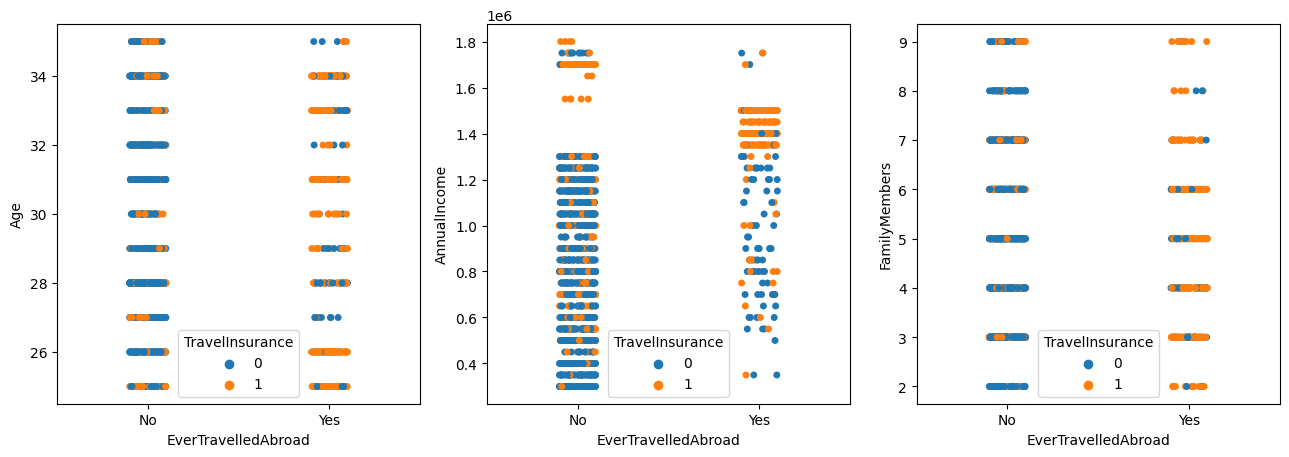

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df, x='EverTravelledAbroad', y=nums[i], hue='TravelInsurance')
    plt.tight_layout()

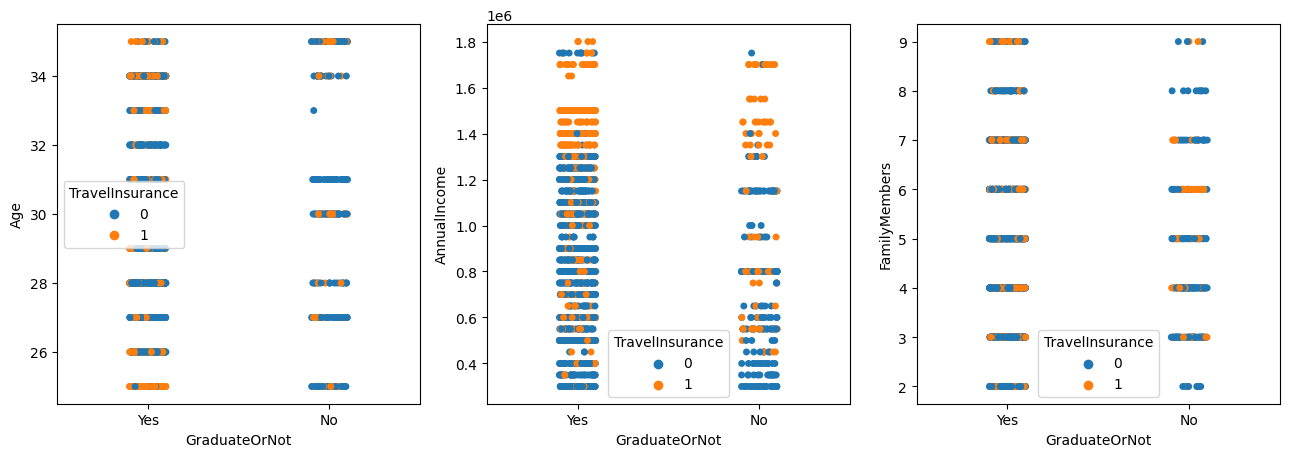

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df, x='GraduateOrNot', y=nums[i], hue='TravelInsurance')
    plt.tight_layout()

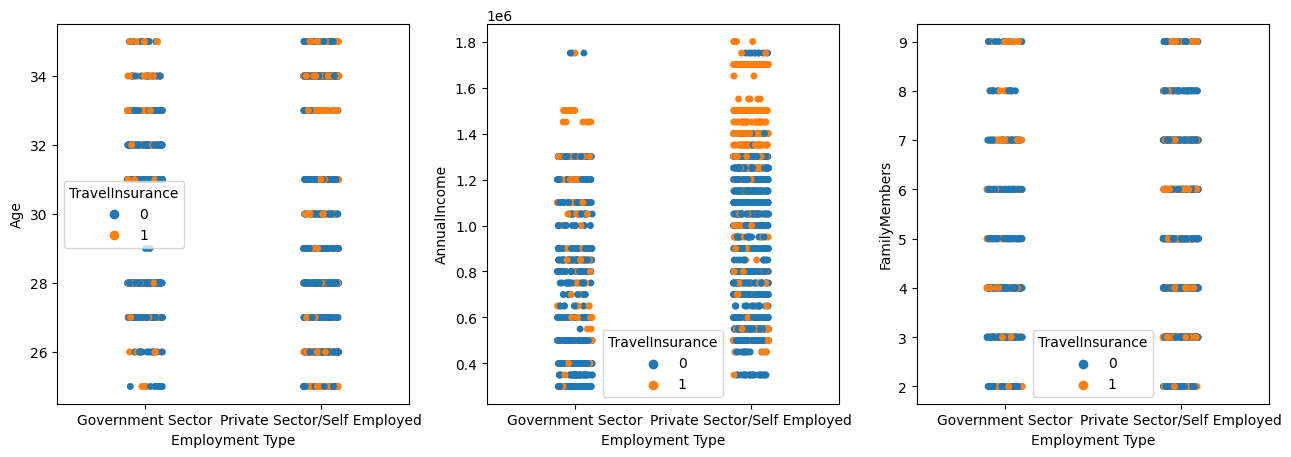

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df, x='Employment Type', y=nums[i], hue='TravelInsurance')
    plt.tight_layout()

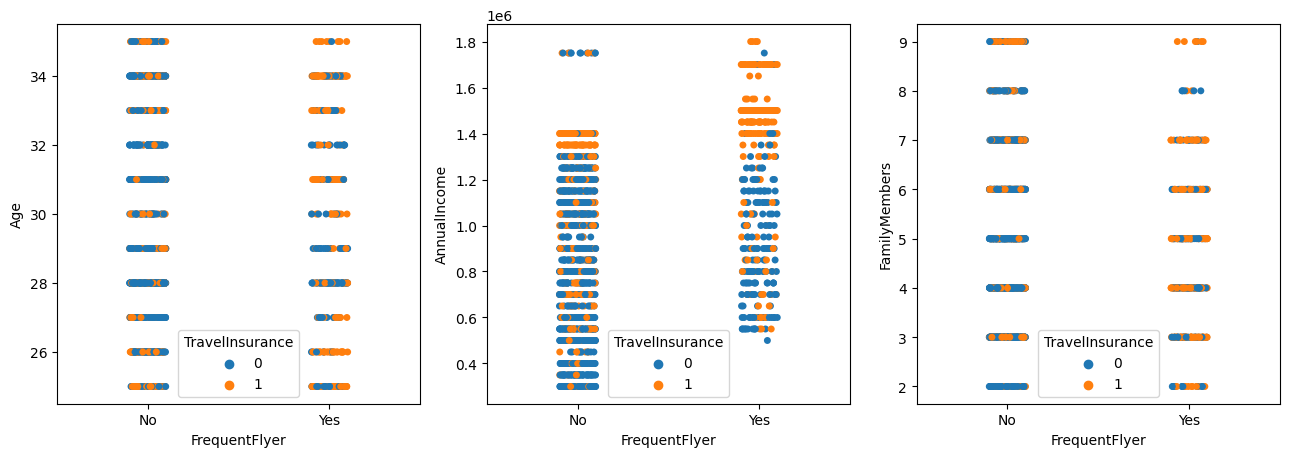

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df, x='FrequentFlyer', y=nums[i], hue='TravelInsurance')
    plt.tight_layout()

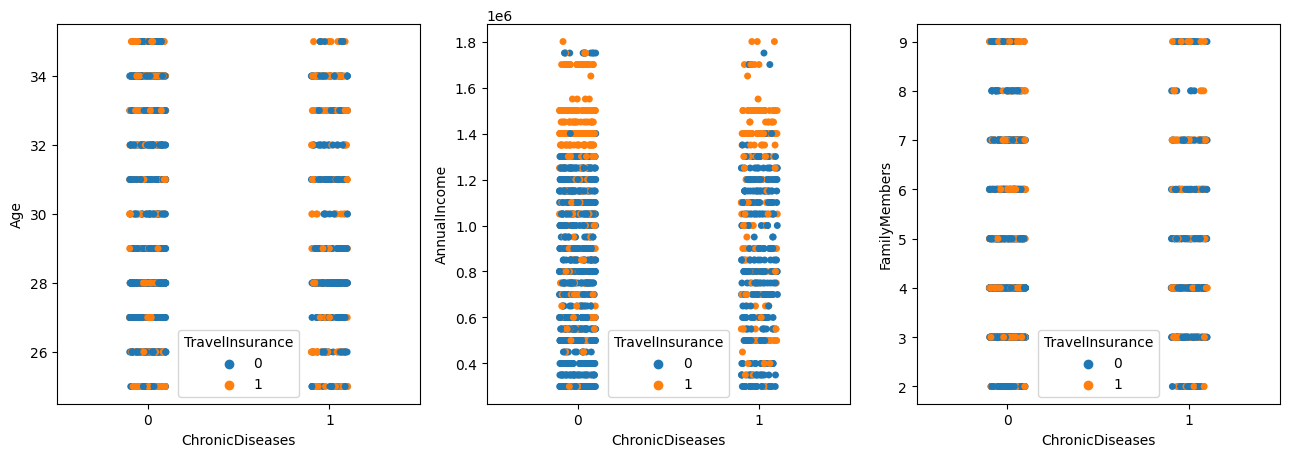

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df, x='ChronicDiseases', y=nums[i], hue='TravelInsurance')
    plt.tight_layout()

Dari Striplot di atas terlihat cukup konsisten antara fitur EverTraveledAbroad,FrequentFlyer, AnnualIncome dengan pembelian TravelInsurance